In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from datetime import datetime

from data_helpers.syntax_graph import SyntaxGraph
from data_helpers.tasak_reader import TasakReader

# functions for creating database and collecting collocations
from collect_functions_1 import *


# Tabel 1 andmete kogumine

In [3]:
%%time

file_name = 'data/tasak.vert'

my_reader = TasakReader(
   file_name = file_name
)

CPU times: user 26 µs, sys: 0 ns, total: 26 µs
Wall time: 28.1 µs


data/tasak.vert


TSV lines:   1%|          | 202197/20058039 [00:00<00:58, 337192.89it/s]

 ---- SENTENCE_ID:  202590
Graph image 'graph.png' has been generated.


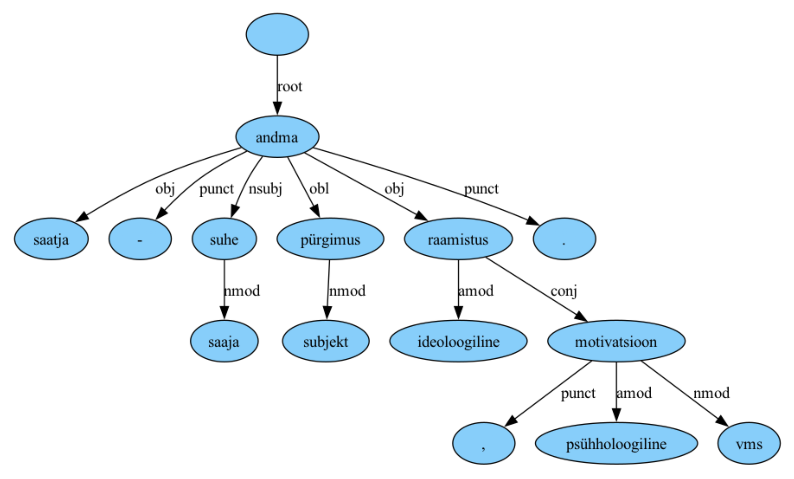

andmebaasi salvestatud kollokatsioonid kollektsioonidest: 0 - 202590


'collocations'

{('andma', '', 'obj', 'gen', '', '', 'obj', 'gen', '', ''): {'total': 1,
  'total_all': 1.0,
  'deprel1_before': 1,
  'deprel2_before': 1,
  'verb_before': 1},
 ('andma', '', 'obj', 'gen', '', '', 'nsubj', 'nom', '', ''): {'total': 1,
  'total_all': 2,
  'deprel1_before': 1,
  'deprel2_before': 1,
  'verb_before': 1},
 ('andma', '', 'obj', 'gen', '', '', 'obl', 'all', '', ''): {'total': 1,
  'total_all': 2,
  'deprel1_before': 1,
  'deprel2_before': 1,
  'verb_before': 1},
 ('andma', '', 'nsubj', 'nom', '', '', 'obj', 'gen', '', ''): {'total': 1,
  'total_all': 2,
  'deprel1_before': 1,
  'deprel2_before': 1,
  'verb_before': 0},
 ('andma', '', 'nsubj', 'nom', '', '', 'nsubj', 'nom', '', ''): {'total': 1,
  'total_all': 1,
  'deprel1_before': 0,
  'deprel2_before': 0,
  'verb_before': 0},
 ('andma', '', 'nsubj', 'nom', '', '', 'obl', 'all', '', ''): {'total': 1,
  'total_all': 1,
  'deprel1_before': 1,
  'deprel2_before': 0,
  'verb_before': 0},
 ('andma', '', 'obl', 'all', '', '', 'ob

 ---- SENTENCE_ID:  202803
Graph image 'graph.png' has been generated.


<Figure size 640x480 with 0 Axes>

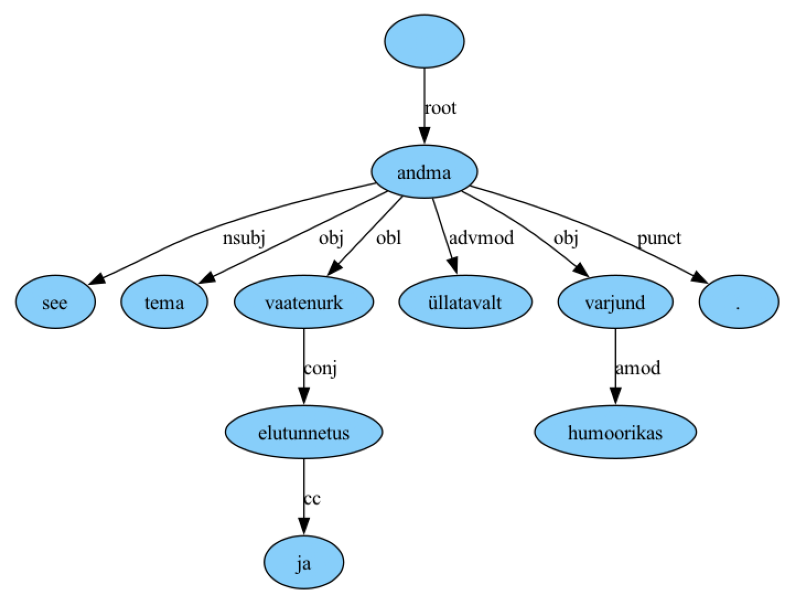

andmebaasi salvestatud kollokatsioonid kollektsioonidest: 0 - 202803


'collocations'

{('andma', '', 'nsubj', 'nom', '', '', 'nsubj', 'nom', '', ''): {'total': 1,
  'total_all': 1,
  'deprel1_before': 0,
  'deprel2_before': 0,
  'verb_before': 0},
 ('andma', '', 'nsubj', 'nom', '', '', 'obj', 'gen', '', ''): {'total': 1,
  'total_all': 2,
  'deprel1_before': 2,
  'deprel2_before': 0,
  'verb_before': 0},
 ('andma', '', 'nsubj', 'nom', '', '', 'obl', 'all', '', ''): {'total': 1,
  'total_all': 1,
  'deprel1_before': 1,
  'deprel2_before': 0,
  'verb_before': 0},
 ('andma',
  '',
  'nsubj',
  'nom',
  '',
  '',
  'advmod',
  '<puudub>',
  '',
  ''): {'total': 1, 'total_all': 1, 'deprel1_before': 1, 'deprel2_before': 0, 'verb_before': 0},
 ('andma', '', 'obj', 'gen', '', '', 'nsubj', 'nom', '', ''): {'total': 1,
  'total_all': 2,
  'deprel1_before': 0,
  'deprel2_before': 2,
  'verb_before': 2},
 ('andma', '', 'obj', 'gen', '', '', 'obj', 'gen', '', ''): {'total': 1,
  'total_all': 1.0,
  'deprel1_before': 1,
  'deprel2_before': 1,
  'verb_before': 2},
 ('andma', '', 'obj'

TSV lines:   1%|▏         | 292194/20058039 [00:01<02:39, 124027.94it/s]

 ---- SENTENCE_ID:  207193
Graph image 'graph.png' has been generated.


<Figure size 640x480 with 0 Axes>

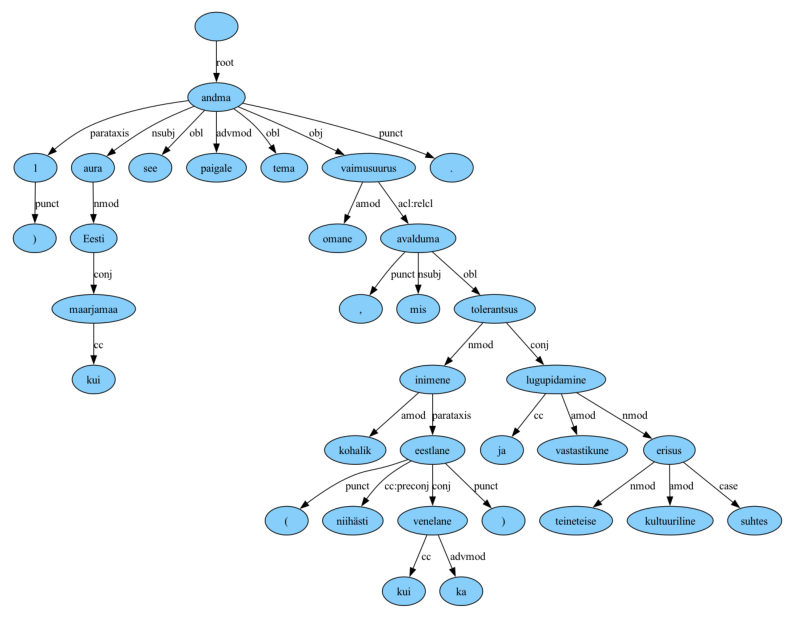

andmebaasi salvestatud kollokatsioonid kollektsioonidest: 0 - 207193


'collocations'

{('andma', '', 'nsubj', 'nom', '', '', 'nsubj', 'nom', '', ''): {'total': 1,
  'total_all': 1,
  'deprel1_before': 0,
  'deprel2_before': 0,
  'verb_before': 0},
 ('andma', '', 'nsubj', 'nom', '', '', 'obl', 'all', '', ''): {'total': 1,
  'total_all': 2,
  'deprel1_before': 2,
  'deprel2_before': 0,
  'verb_before': 0},
 ('andma',
  '',
  'nsubj',
  'nom',
  '',
  '',
  'advmod',
  '<puudub>',
  '',
  ''): {'total': 1, 'total_all': 1, 'deprel1_before': 1, 'deprel2_before': 0, 'verb_before': 0},
 ('andma', '', 'nsubj', 'nom', '', '', 'obj', 'gen', '', ''): {'total': 1,
  'total_all': 1,
  'deprel1_before': 1,
  'deprel2_before': 0,
  'verb_before': 0},
 ('andma', '', 'obl', 'all', '', '', 'nsubj', 'nom', '', ''): {'total': 1,
  'total_all': 2,
  'deprel1_before': 0,
  'deprel2_before': 2,
  'verb_before': 2},
 ('andma', '', 'obl', 'all', '', '', 'obl', 'all', '', ''): {'total': 1,
  'total_all': 1.0,
  'deprel1_before': 1,
  'deprel2_before': 1,
  'verb_before': 2},
 ('andma',
  '',
  '

TSV lines:   5%|▍         | 992459/20058039 [00:04<00:59, 322632.92it/s]

 ---- SENTENCE_ID:  261008
Graph image 'graph.png' has been generated.


<Figure size 640x480 with 0 Axes>

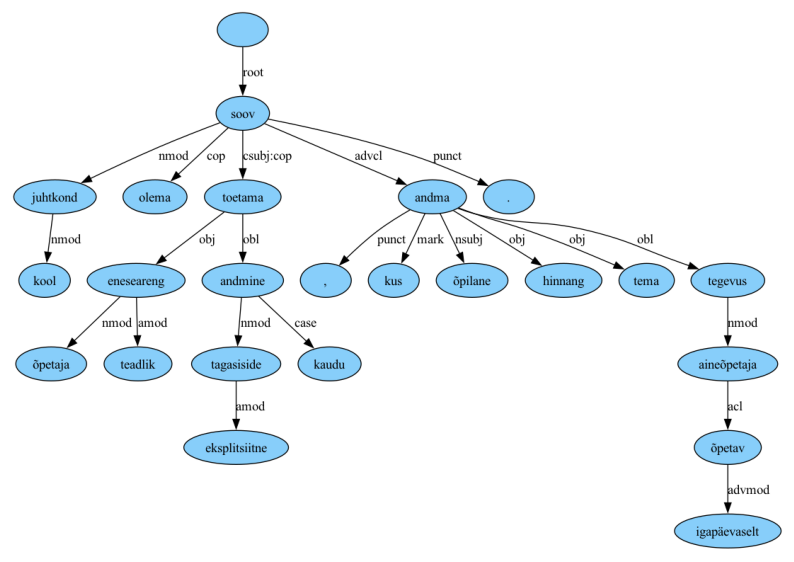

andmebaasi salvestatud kollokatsioonid kollektsioonidest: 0 - 261008


'collocations'

{('olema', '', '', '', '', '', '', '', '', ''): {'total': 1,
  'total_all': 1,
  'deprel1_before': 0,
  'deprel2_before': 0,
  'verb_before': 0},
 ('andma', '', 'nsubj', 'nom', '', '', 'nsubj', 'nom', '', ''): {'total': 1,
  'total_all': 1,
  'deprel1_before': 0,
  'deprel2_before': 0,
  'verb_before': 0},
 ('andma', '', 'nsubj', 'nom', '', '', 'obj', 'gen', '', ''): {'total': 1,
  'total_all': 1,
  'deprel1_before': 1,
  'deprel2_before': 0,
  'verb_before': 0},
 ('andma', '', 'nsubj', 'nom', '', '', 'obj', 'part', '', ''): {'total': 1,
  'total_all': 1,
  'deprel1_before': 1,
  'deprel2_before': 0,
  'verb_before': 0},
 ('andma', '', 'nsubj', 'nom', '', '', 'obl', 'all', '', ''): {'total': 1,
  'total_all': 1,
  'deprel1_before': 1,
  'deprel2_before': 0,
  'verb_before': 0},
 ('andma', '', 'obj', 'gen', '', '', 'nsubj', 'nom', '', ''): {'total': 1,
  'total_all': 1,
  'deprel1_before': 0,
  'deprel2_before': 1,
  'verb_before': 1},
 ('andma', '', 'obj', 'gen', '', '', 'obj', 'gen', 

TSV lines:  65%|██████▌   | 13102353/20058039 [00:41<00:22, 314725.73it/s]

 ---- SENTENCE_ID:  8415776
Graph image 'graph.png' has been generated.


<Figure size 640x480 with 0 Axes>

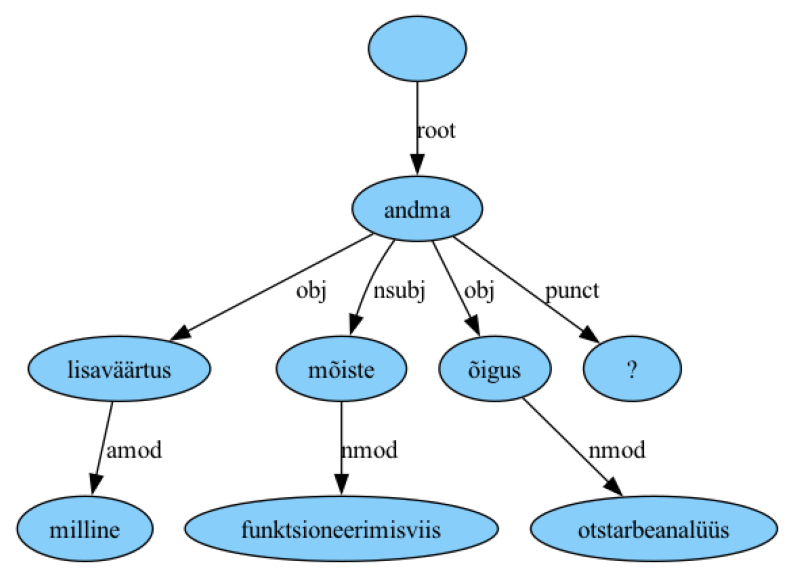

andmebaasi salvestatud kollokatsioonid kollektsioonidest: 0 - 8415776


'collocations'

{('andma', '', 'obj', 'part', '', '', 'obj', 'part', '', ''): {'total': 1,
  'total_all': 1,
  'deprel1_before': 0,
  'deprel2_before': 0,
  'verb_before': 0},
 ('andma', '', 'obj', 'part', '', '', 'nsubj', 'gen', '', ''): {'total': 1,
  'total_all': 1,
  'deprel1_before': 1,
  'deprel2_before': 0,
  'verb_before': 0},
 ('andma', '', 'obj', 'part', '', '', 'obj', 'gen', '', ''): {'total': 1,
  'total_all': 1,
  'deprel1_before': 1,
  'deprel2_before': 0,
  'verb_before': 0},
 ('andma', '', 'nsubj', 'gen', '', '', 'obj', 'part', '', ''): {'total': 1,
  'total_all': 1,
  'deprel1_before': 0,
  'deprel2_before': 1,
  'verb_before': 1},
 ('andma', '', 'nsubj', 'gen', '', '', 'nsubj', 'gen', '', ''): {'total': 1,
  'total_all': 1,
  'deprel1_before': 0,
  'deprel2_before': 0,
  'verb_before': 1},
 ('andma', '', 'nsubj', 'gen', '', '', 'obj', 'gen', '', ''): {'total': 1,
  'total_all': 1,
  'deprel1_before': 1,
  'deprel2_before': 0,
  'verb_before': 1},
 ('andma', '', 'obj', 'gen', '', '', 

 ---- SENTENCE_ID:  8415814
Graph image 'graph.png' has been generated.


<Figure size 640x480 with 0 Axes>

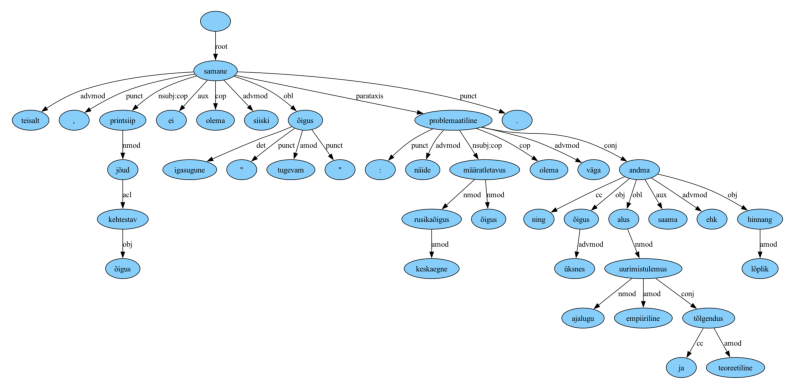

andmebaasi salvestatud kollokatsioonid kollektsioonidest: 0 - 8415814


'collocations'

{('olema', '', '', '', '', '', '', '', '', ''): {'total': 1,
  'total_all': 1,
  'deprel1_before': 0,
  'deprel2_before': 0,
  'verb_before': 0}}

 ---- SENTENCE_ID:  8416300
Graph image 'graph.png' has been generated.


<Figure size 640x480 with 0 Axes>

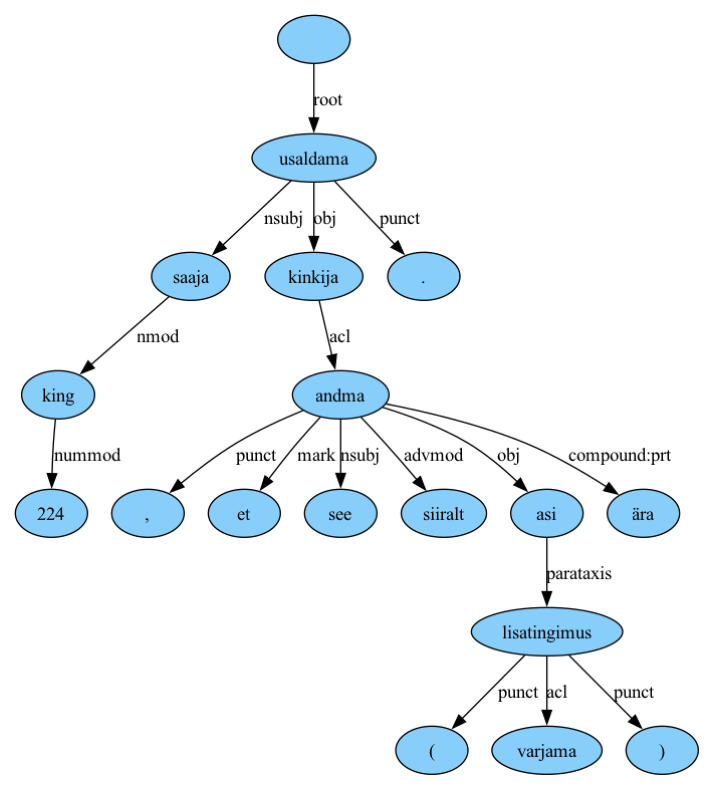

andmebaasi salvestatud kollokatsioonid kollektsioonidest: 0 - 8416300


'collocations'

{('usaldama', '', 'nsubj', 'nom', '', '', 'nsubj', 'nom', '', ''): {'total': 1,
  'total_all': 1,
  'deprel1_before': 0,
  'deprel2_before': 0,
  'verb_before': 0},
 ('usaldama', '', 'nsubj', 'nom', '', '', 'obj', 'part', '', ''): {'total': 1,
  'total_all': 1,
  'deprel1_before': 1,
  'deprel2_before': 0,
  'verb_before': 0},
 ('usaldama', '', 'obj', 'part', '', '', 'nsubj', 'nom', '', ''): {'total': 1,
  'total_all': 1,
  'deprel1_before': 0,
  'deprel2_before': 1,
  'verb_before': 1},
 ('usaldama', '', 'obj', 'part', '', '', 'obj', 'part', '', ''): {'total': 1,
  'total_all': 1,
  'deprel1_before': 0,
  'deprel2_before': 0,
  'verb_before': 1},
 ('andma', 'ära', 'nsubj', 'nom', '', '', 'nsubj', 'nom', '', ''): {'total': 1,
  'total_all': 1,
  'deprel1_before': 0,
  'deprel2_before': 0,
  'verb_before': 0},
 ('andma',
  'ära',
  'nsubj',
  'nom',
  '',
  '',
  'advmod',
  '<puudub>',
  '',
  ''): {'total': 1, 'total_all': 1, 'deprel1_before': 1, 'deprel2_before': 0, 'verb_before': 0}

 ---- SENTENCE_ID:  8416332
Graph image 'graph.png' has been generated.


<Figure size 640x480 with 0 Axes>

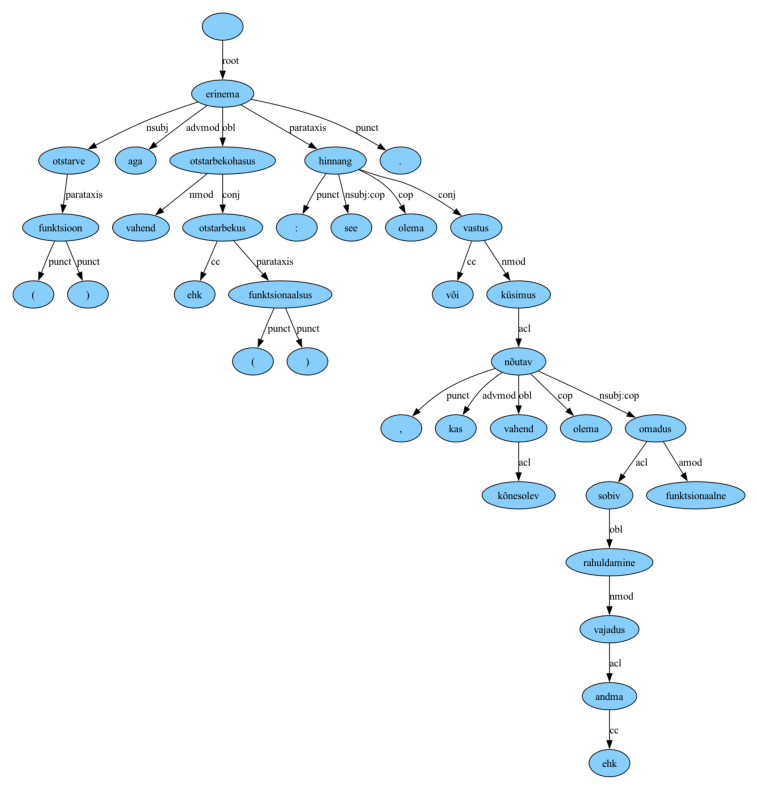

andmebaasi salvestatud kollokatsioonid kollektsioonidest: 0 - 8416332


'collocations'

{('erinema', '', 'nsubj', 'nom', '', '', 'nsubj', 'nom', '', ''): {'total': 1,
  'total_all': 1,
  'deprel1_before': 0,
  'deprel2_before': 0,
  'verb_before': 0},
 ('erinema',
  '',
  'nsubj',
  'nom',
  '',
  '',
  'advmod',
  '<puudub>',
  '',
  ''): {'total': 1, 'total_all': 1, 'deprel1_before': 1, 'deprel2_before': 0, 'verb_before': 0},
 ('erinema', '', 'nsubj', 'nom', '', '', 'obl', 'el', '', ''): {'total': 1,
  'total_all': 1,
  'deprel1_before': 1,
  'deprel2_before': 0,
  'verb_before': 0},
 ('erinema',
  '',
  'advmod',
  '<puudub>',
  '',
  '',
  'nsubj',
  'nom',
  '',
  ''): {'total': 1, 'total_all': 1, 'deprel1_before': 0, 'deprel2_before': 1, 'verb_before': 1},
 ('erinema',
  '',
  'advmod',
  '<puudub>',
  '',
  '',
  'advmod',
  '<puudub>',
  '',
  ''): {'total': 1, 'total_all': 1, 'deprel1_before': 0, 'deprel2_before': 0, 'verb_before': 1},
 ('erinema',
  '',
  'advmod',
  '<puudub>',
  '',
  '',
  'obl',
  'el',
  '',
  ''): {'total': 1, 'total_all': 1, 'deprel1_befo

TSV lines:  65%|██████▌   | 13133829/20058039 [00:43<02:07, 54107.82it/s] 

 ---- SENTENCE_ID:  8416634
Graph image 'graph.png' has been generated.


<Figure size 640x480 with 0 Axes>

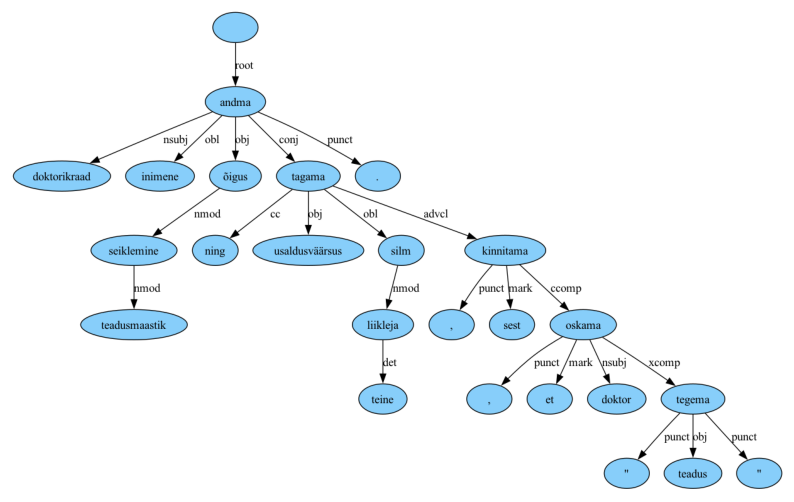

andmebaasi salvestatud kollokatsioonid kollektsioonidest: 0 - 8416634


'collocations'

{('andma', '', 'nsubj', 'nom', '', '', 'nsubj', 'nom', '', ''): {'total': 1,
  'total_all': 1,
  'deprel1_before': 0,
  'deprel2_before': 0,
  'verb_before': 0},
 ('andma', '', 'nsubj', 'nom', '', '', 'obl', 'all', '', ''): {'total': 1,
  'total_all': 1,
  'deprel1_before': 1,
  'deprel2_before': 0,
  'verb_before': 0},
 ('andma', '', 'nsubj', 'nom', '', '', 'obj', 'gen', '', ''): {'total': 1,
  'total_all': 1,
  'deprel1_before': 1,
  'deprel2_before': 0,
  'verb_before': 0},
 ('andma', '', 'obl', 'all', '', '', 'nsubj', 'nom', '', ''): {'total': 1,
  'total_all': 1,
  'deprel1_before': 0,
  'deprel2_before': 1,
  'verb_before': 1},
 ('andma', '', 'obl', 'all', '', '', 'obl', 'all', '', ''): {'total': 1,
  'total_all': 1,
  'deprel1_before': 0,
  'deprel2_before': 0,
  'verb_before': 1},
 ('andma', '', 'obl', 'all', '', '', 'obj', 'gen', '', ''): {'total': 1,
  'total_all': 1,
  'deprel1_before': 1,
  'deprel2_before': 0,
  'verb_before': 1},
 ('andma', '', 'obj', 'gen', '', '', 'nsub

TSV lines: 100%|██████████| 20058039/20058039 [01:04<00:00, 311173.81it/s]

andmebaasi salvestatud kollokatsioonid kollektsioonidest: 0 - 18969731
Verb stat saved to  tasak_verb_kids_20240321-155548.csv
done.
CPU times: user 1min 6s, sys: 2.85 s, total: 1min 9s
Wall time: 1min 5s


<Figure size 640x480 with 0 Axes>

In [4]:
%%time

TYPE = 'obl_verb'
TABLENAME = f'{TYPE}'
BATCH_SIZE = 1

date_time = datetime.now().strftime("%Y%m%d-%H%M%S")
db_file_name = f"custom_{TYPE}_collocations_{date_time}.db"

my_sqlite_db = DbMethods(db_file_name=db_file_name, table1_name=TYPE, table2_name=TYPE+'_examples')
my_sqlite_db.prep_coll_db()


# hoitakse algusest lõpuni mälus
verb_global_stat = {}

# kollokatsioonid, tühjendatakse peale igat salvestamist
collocations = {}
count = 0
for collection_id, graph in my_reader.get_sentences():
    collection_id = int(collection_id)
    # LISATUD TESTIMISEKS
    if collection_id not in (207193, 261008, 8415776, 8416634, 8415814, 8416332, 202590, 202803, 8416300):
        continue
    print(' ---- SENTENCE_ID: ', collection_id)
    count += 1
    collocations, verb_global_stat, = extract_something(graph, collection_id, collocations, verb_global_stat )
    if not collection_id == 0 and not collection_id % BATCH_SIZE:
        my_sqlite_db.save_coll_to_db(collocations, collection_id)
        display ('collocations', collocations)
        collocations = {}
    
    
# saving last batch
my_sqlite_db.save_coll_to_db(collocations, collection_id)
collocations = {}
my_sqlite_db.index_fields()

df = verb_stat_to_df(verb_global_stat, f'custom_verb_kids_{date_time}.csv')
df.to_sql(name='verbs_global_stat', con=my_sqlite_db._connection)

print('done.')